In [1]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline

In [2]:
n = 192

Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 

dh = 5/(n-1)

T = 8000

dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)

In [3]:
uvinitial = numpy.load('./uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

In [4]:
for t in range(1,nt):
    Un = U.copy()
    Vn = V.copy()
    U[1:-1,1:-1] = Un[1:-1,1:-1]+\
                   Du*dt/(dh**2)*((Un[1:-1,2:]-2*Un[1:-1,1:-1]+Un[1:-1,:-2])+\
                                  (Un[2:,1:-1]-2*Un[1:-1,1:-1]+Un[:-2,1:-1]))-\
                  dt*Un[1:-1,1:-1]*Vn[1:-1,1:-1]**2+\
                  F*(1-Un[1:-1,1:-1])*dt
    V[1:-1,1:-1] = Vn[1:-1,1:-1]+\
                   Dv*dt/(dh**2)*(Vn[1:-1,2:]-2*Vn[1:-1,1:-1]+Vn[1:-1,:-2]+Vn[2:,1:-1]-2*Vn[1:-1,1:-1]+Vn[:-2,1:-1])+\
                   dt*Un[1:-1,1:-1]*Vn[1:-1,1:-1]**2-\
                   (F+k)*Vn[1:-1,1:-1]*dt
    #U BC
    U[0,1:-1] = U[1,1:-1]
    U[-1,1:-1] = U[-2,1:-1]
    U[1:-1,0] = U[1:-1,1]
    U[1:-1,-1] = U[1:-1,-2]
    U[0,0] = U[1,1]
    U[0,-1] = U[1,-2]
    U[-1,0] = U[-2,1]
    U[-1,-1] = U[-2,-2]
    
    #V BC
    V[0,1:-1] = V[1,1:-1]
    V[-1,1:-1] = V[-2,1:-1]
    V[1:-1,0] = V[1:-1,1]
    V[1:-1,-1] = V[1:-1,-2]
    V[0,0] = V[1,1]
    V[0,-1] = V[1,-2]
    V[-1,0] = V[-2,1]
    V[-1,-1] = V[-2,-2]

In [5]:
U[100,::40]

array([ 0.92468763,  0.85016693,  0.66816509,  0.90198113,  0.90395252])

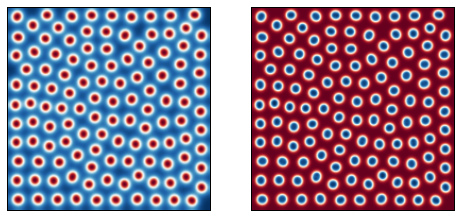

In [6]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

Homework is the code above, below is something for fun.

In [7]:
uvinitial = numpy.load('./uvinitial.npz')
U_initial = uvinitial['U']
V_initial = uvinitial['V']

In [13]:
def assignment4(nt,U,V,Du, Dv, F, k):
        
    for t in range(1,nt):
        Un = U.copy()
        Vn = V.copy()
        U[1:-1,1:-1] = Un[1:-1,1:-1]+\
                   Du*dt/(dh**2)*((Un[1:-1,2:]-2*Un[1:-1,1:-1]+Un[1:-1,:-2])+\
                                  (Un[2:,1:-1]-2*Un[1:-1,1:-1]+Un[:-2,1:-1]))-\
                  dt*Un[1:-1,1:-1]*Vn[1:-1,1:-1]**2+\
                  F*(1-Un[1:-1,1:-1])*dt
        V[1:-1,1:-1] = Vn[1:-1,1:-1]+\
                   Dv*dt/(dh**2)*(Vn[1:-1,2:]-2*Vn[1:-1,1:-1]+Vn[1:-1,:-2]+Vn[2:,1:-1]-2*Vn[1:-1,1:-1]+Vn[:-2,1:-1])+\
                   dt*Un[1:-1,1:-1]*Vn[1:-1,1:-1]**2-\
                   (F+k)*Vn[1:-1,1:-1]*dt
    #BC
        U[0,1:-1] = U[1,1:-1]
        U[-1,1:-1] = U[-2,1:-1]
        U[1:-1,0] = U[1:-1,1]
        U[1:-1,-1] = U[1:-1,-2]
        U[0,0] = U[1,1]
        U[0,-1] = U[1,-2]
        U[-1,0] = U[-2,1]
        U[-1,-1] = U[-2,-2]
    
    #corner
        V[0,1:-1] = V[1,1:-1]
        V[-1,1:-1] = V[-2,1:-1]
        V[1:-1,0] = V[1:-1,1]
        V[1:-1,-1] = V[1:-1,-2]
        V[0,0] = V[1,1]
        V[0,-1] = V[1,-2]
        V[-1,0] = V[-2,1]
        V[-1,-1] = V[-2,-2]
    
    a = [U, V]
    return a

In [14]:
U2 = assignment4(nt,U_initial, V_initial,0.00014, 0.00006, 0.035, 0.065 )[0]
V2 = assignment4(nt,U_initial, V_initial,0.00014, 0.00006, 0.035, 0.065 )[1]

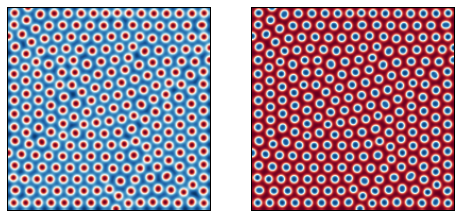

In [15]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U2, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V2, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [16]:
U3 = assignment4(nt,U_initial, V_initial,0.00016, 0.00008, 0.060, 0.062 )[0]
V3 = assignment4(nt,U_initial, V_initial,0.00016, 0.00008, 0.060, 0.062 )[1]

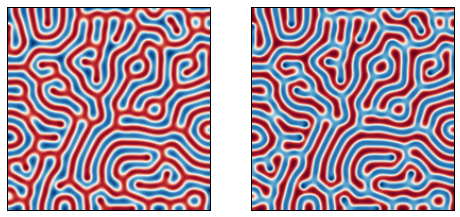

In [17]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U3, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V3, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [18]:
U4 = assignment4(nt,U_initial, V_initial,0.00019, 0.00005, 0.060, 0.062 )[0]
V4 = assignment4(nt,U_initial, V_initial,0.00019, 0.00005, 0.060, 0.062 )[1]

C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: overflow encountered in add
C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in add
C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in multiply
C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in multiply
C:\Users\55468\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in subtract


C:\Users\55468\Anaconda3\lib\site-packages\numpy\ma\core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


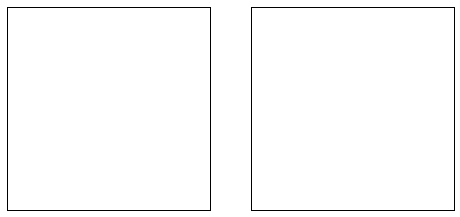

In [19]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U4, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V4, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);